In [1]:
#  the code and the algorithm used to predict the Breast cancer
#-----import library for data handling-----#
import pandas as pd
import numpy as np
import itertools
import random

In [2]:
#-----import library for grphical ineterpretation-----# 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import matplotlib.gridspec as gridspec
import seaborn as sns 

sns.set(style='whitegrid', palette='muted', font_scale=2) 
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8   
import os
##'ggplot','fivethirtyeight','bmh' is clour scheme
##Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
##set the default color palette for figures #'whitegrid'=get white background
##figure colour = palette='dark' #font_scale is word size
##There are six variations of the default theme, called deep, muted, pastel, bright, dark, and colorblind.
##Eg: from pylab import rcParams rcParams['figure.figsize'] = 5, 10This makes the figure's width 5 inches, and its height 10 inches.


In [3]:
#-----Reading the datasets-----#
df=pd.read_csv('dataR2.csv')


#-----Understanding data structure-----#
df.isnull().sum()  
##This will give number of NaN values in every column.

#-----data features-----#
df.describe()  

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,0.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,0.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,1.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,1.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,1.000000


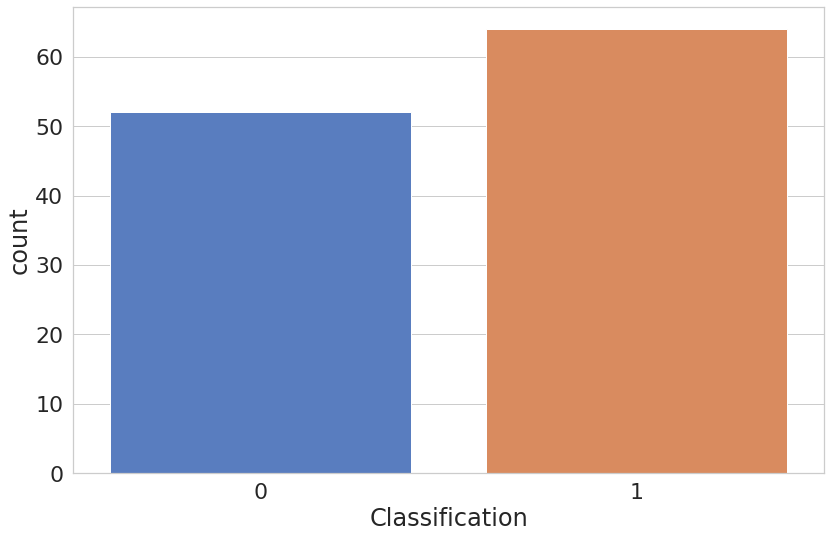

/home/kkumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  app.launch_new_instance()


,Age_mean,Age_std,Age_min,Age_max,Glucose_mean,Glucose_std,Glucose_min,Glucose_max,BMI_mean,BMI_std,...,Adiponectin_min,Adiponectin_max,Resistin_mean,Resistin_std,Resistin_min,Resistin_max,MCP.1_mean,MCP.1_std,MCP.1_min,MCP.1_max
Classification,,,,,,,,,,,,,,,,,,,,,
0,58.076923,18.957999,24,89,88.230769,10.191529,60,118,28.317336,5.427465,...,2.19428,38.04,11.614813,11.447053,3.29175,82.1000,499.730692,292.242157,45.843,1256.083
1,56.671875,13.493155,34,86,105.562500,26.557440,70,201,26.984740,4.620398,...,1.65602,33.75,17.253777,12.636979,3.21000,55.2153,563.016500,384.001622,90.090,1698.440


In [4]:
#------classification labels-----#
sns.countplot(x='Classification',data=df)
plt.show()

#-----groupby() function is used to split the data into groups based on some criteria-----#
grouped = df.groupby('Classification').agg({'Age':['mean', 'std', min, max], 
                                       'Glucose':['mean', 'std', min, max],
                                       'BMI':['mean', 'std', min, max],
                                       'Insulin':['mean', 'std', min, max],
                                       'HOMA':['mean', 'std', min, max],
                                       'Leptin':['mean', 'std', min, max],
                                       'Adiponectin':['mean', 'std', min, max],
                                       'Resistin':['mean', 'std', min, max],
                                       'MCP.1':['mean', 'std', min, max]
                                      })
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()] 
grouped
##joins by(_),each attribute with describe

/home/kkumar/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kkumar/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kkumar/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

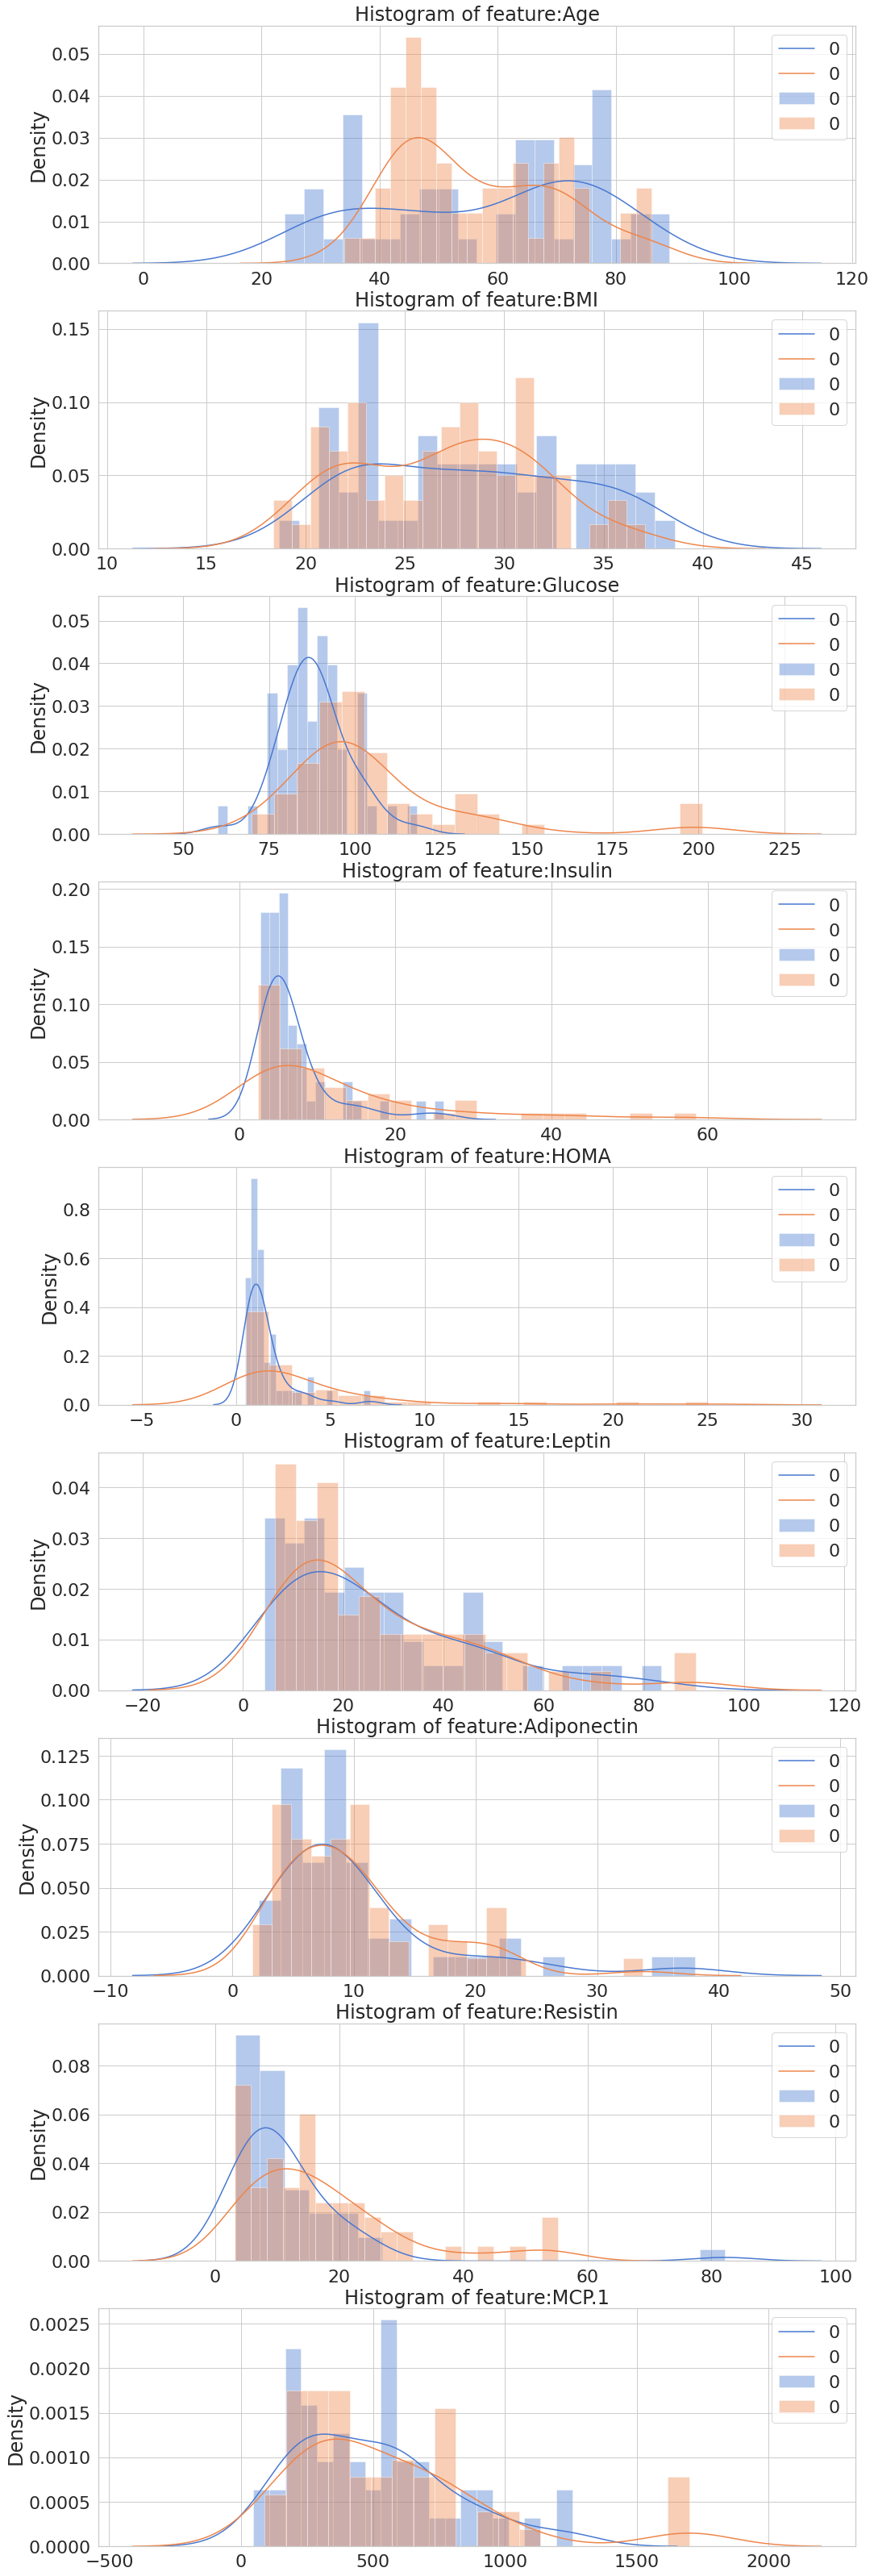

In [5]:
#-----understanding the ditribution of features in two classes-----#
columns=df.columns[:9]      
plt.figure(figsize=(15,90)) 
gs = gridspec.GridSpec(15, 1)  

for i, cn in enumerate(df[columns]): 
    ax = plt.subplot(gs[i]) 
    sns.distplot(df[cn][df.Classification == 0], bins=20) 
    sns.distplot(df[cn][df.Classification == 1], bins=20)
    ax.set_xlabel('')
    plt.legend(df["Classification"])
    ax.set_title('Histogram of feature:' + str(cn)) 
plt.show()
##:9 no. of feature(dig. illustration)
##'15' width, '90' height 
##15 verticle space, 1 horizontal space
##enumerate: Tells one by one
##:ax-object or array of Axes objects.
##subplot() function can be called to plot two or more plots in one figure. 
##width of histogram(bin=20)
##sequence of character (#+ str(cn))

In [6]:
columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1'],
      dtype='object')

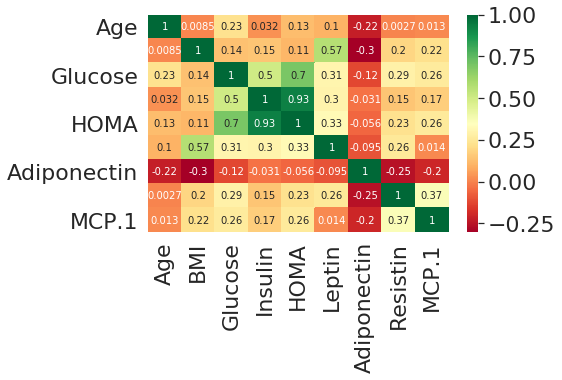

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


In [6]:
#-----correlation plot-----#
sns.heatmap(df[df.columns[:9]].corr(),annot=True,cmap='RdYlGn')
plt.show()
## A heat map is a two-dimensional representation of data in which values are represented by colors. maps allow the viewer to understand complex data sets.There can be many ways to display heat maps, but they all share one thing in common -- they use color to communicate relationships between data values that would be would be much harder to understand if presented numerically in a spreadsheet.
## annot parameter which will add correlation numbers to each cell in the visuals.
##cmap='RdYlGn' for colour assignment


df.corr()

In [7]:
# importing library for machine learning
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [8]:
# testing training data segregation
Classification=df['Classification']
data=df[df.columns[:9]]
train,test=train_test_split(df,test_size=0.25,random_state=0,stratify=df['Classification'])# stratify the outcome
train_X=train[train.columns[:9]]
test_X=test[test.columns[:9]]
train_Y=train['Classification']
test_Y=test['Classification']


In [9]:
# building models
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])


modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
predictionRF=modelRF.predict(test_X)
pd.Series(modelRF.feature_importances_,index=train_X.columns).sort_values(ascending=False)

BMI            0.150225
Age            0.147369
Glucose        0.143161
Resistin       0.128550
HOMA           0.103256
Insulin        0.098989
Adiponectin    0.076818
MCP.1          0.076091
Leptin         0.075541
dtype: float64

In [10]:
#-----for K-fold cross validation-----#
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler 
#score evaluation


kfold = KFold(n_splits=10, random_state=None) 

In [11]:
#-----Gaussian Standardisation-----#
features=df[df.columns[:9]]
features_standard=StandardScaler().fit_transform(features)
X=pd.DataFrame(features_standard,columns=['HOMA', 'Glucose', 'Adiponectin', 'MCP.1', 
                                          'Insulin', 'BMI', 'Resistin', 'Age','Leptin'])
X['Classification']=df['Classification']


In [12]:
#-----k- fold cross validation-----#
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X[X.columns[:9]], X['Classification'], cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)   
cv_models_dataframe.columns=['CV Mean']    
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])


,CV Mean
Random forest,0.562879
Decision Tree,0.555303
Naive Bayes,0.547727
Linear Svm,0.533333
Radial Svm,0.509091
Logistic Regression,0.509091
KNN,0.506818


In [13]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be for example a list, or an array.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" `cv` instance
        (e.g., `GroupKFold`).
    
    scoring : string, callabl

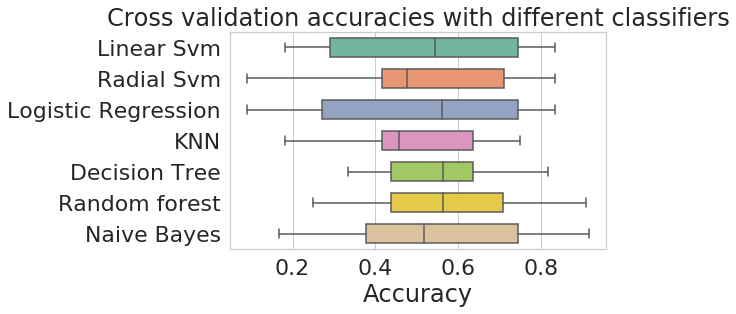

In [14]:
#-----Box plot for Cross validation accuracies with different classifiers-----#
box=pd.DataFrame(accuracy,index=[classifiers])
boxT = box.T
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross validation accuracies with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()


from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)



In [15]:
boxT

,Linear Svm,Radial Svm,Logistic Regression,KNN,Decision Tree,Random forest,Naive Bayes
0,0.250000,0.166667,0.166667,0.416667,0.416667,0.250000,0.916667
1,0.250000,0.416667,0.250000,0.416667,0.666667,0.583333,0.750000
2,0.416667,0.500000,0.333333,0.416667,0.500000,0.416667,0.583333
3,0.750000,0.416667,0.750000,0.500000,0.333333,0.500000,0.916667
4,0.833333,0.833333,0.833333,0.750000,0.583333,0.750000,0.416667
5,0.833333,0.666667,0.666667,0.750000,0.416667,0.583333,0.166667
6,0.636364,0.818182,0.727273,0.636364,0.636364,0.909091,0.454545
7,0.727273,0.727273,0.818182,0.636364,0.818182,0.818182,0.727273
8,0.454545,0.454545,0.454545,0.363636,0.636364,0.545455,0.181818
9,0.181818,0.090909,0.090909,0.181818,0.545455,0.272727,0.363636


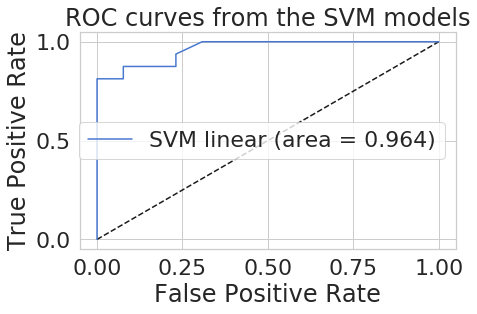

In [16]:
#-----ROC curve for SVM model-----#
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(train_X,train_Y)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y-1, y_pred_prob_SVMlinear, pos_label=0)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the SVM models')
plt.legend(loc='best')
plt.show()

##plt.plot(fpr_SVMlinear[2], tpr_SVMlinear[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2]) plt.plot([1, 2], [1, 2], color='navy', lw=lw, linestyle='--')

##function of kernel is to take data as input and transform it into the required form, For example linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid.

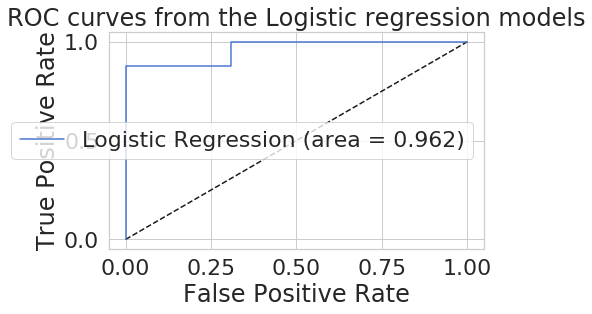

In [17]:
#-----ROC curve for Logistic regression model-----#
modellogisticregession=LogisticRegression()
modellogisticregession.fit(train_X,train_Y)
y_pred_prob_logisticregression = modellogisticregession.predict_proba(test_X)[:,1]
fpr_logisticregression, tpr_logisticregression, thresholds_logisticregression = roc_curve(test_Y-1, y_pred_prob_logisticregression, pos_label=0)
roc_auc_logisticregression = auc(fpr_logisticregression, tpr_logisticregression)
precision_logisticregression, recall_logisticregression, th_logisticregression = precision_recall_curve(test_Y, y_pred_prob_logisticregression)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logisticregression, tpr_logisticregression, label='Logistic Regression (area = %0.3f)' % roc_auc_logisticregression)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the Logistic regression models')
plt.legend(loc='best')
plt.show()

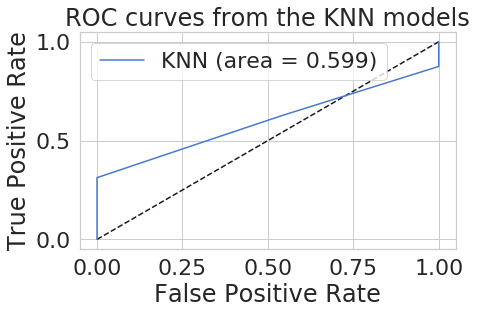

In [18]:
#-----ROC curve for KNN model-----#
modelKNN=KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(train_X,train_Y)
y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y-1, y_pred_prob_KNN, pos_label=0)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the KNN models')
plt.legend(loc='best')
plt.show()

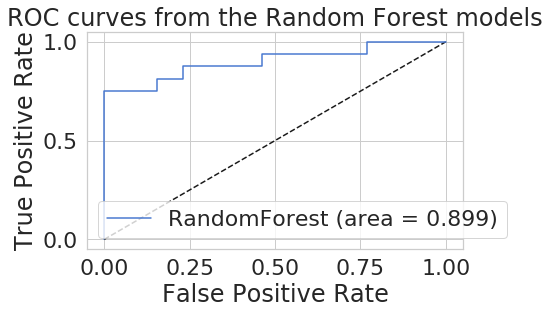

In [19]:
#-----ROC curve for RandomForest model-----#
modelRandomForest=RandomForestClassifier(n_estimators=100,random_state=0)
modelRandomForest.fit(train_X,train_Y)
y_pred_prob_RandomForest = modelRandomForest.predict_proba(test_X)[:,1]
fpr_RandomForest, tpr_RandomForest, thresholds_RandomForest = roc_curve(test_Y-1, y_pred_prob_RandomForest, pos_label=0)
roc_auc_RandomForest = auc(fpr_RandomForest, tpr_RandomForest)
precision_RandomForest, recall_RandomForest, th_RandomForest= precision_recall_curve(test_Y, y_pred_prob_RandomForest)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RandomForest, tpr_RandomForest, label='RandomForest (area = %0.3f)' % roc_auc_RandomForest)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the Random Forest models')
plt.legend(loc='best')
plt.show()

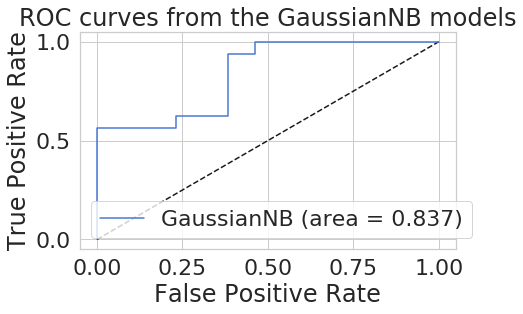

In [20]:
#-----ROC curve for GaussianNB model-----#
modelGaussianNB=GaussianNB()
modelGaussianNB.fit(train_X,train_Y)
y_pred_prob_GaussianNB = modelGaussianNB.predict_proba(test_X)[:,1]
fpr_GaussianNB, tpr_GaussianNB, thresholds_GaussianNB = roc_curve(test_Y-1, y_pred_prob_GaussianNB, pos_label=0)
roc_auc_GaussianNB = auc(fpr_GaussianNB, tpr_GaussianNB)
precision_GaussianNB, recall_GaussianNB, th_GaussianNB = precision_recall_curve(test_Y, y_pred_prob_GaussianNB)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_GaussianNB, tpr_GaussianNB, label='GaussianNB (area = %0.3f)' % roc_auc_GaussianNB)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the GaussianNB models')
plt.legend(loc='best')
plt.show()

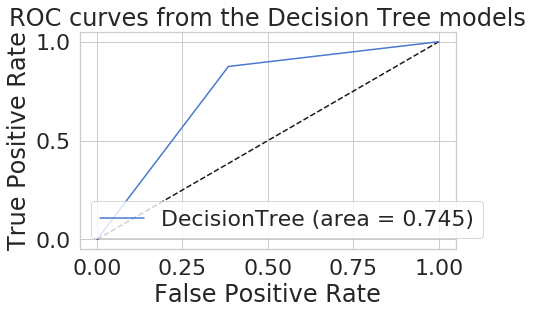

In [21]:
#-----ROC curve for DecisionTree model-----#
modelDecisionTree=DecisionTreeClassifier()
modelDecisionTree.fit(train_X,train_Y)
y_pred_prob_DecisionTree = modelDecisionTree.predict_proba(test_X)[:,1]
fpr_DecisionTree, tpr_DecisionTree, thresholds_DecisionTree = roc_curve(test_Y-1, y_pred_prob_DecisionTree, pos_label=0)
roc_auc_DecisionTree = auc(fpr_DecisionTree, tpr_DecisionTree)
precision_DecisionTree, recall_DecisionTree, th_DecisionTree = precision_recall_curve(test_Y, y_pred_prob_DecisionTree)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_DecisionTree, tpr_DecisionTree, label='DecisionTree (area = %0.3f)' % roc_auc_DecisionTree)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the Decision Tree models')
plt.legend(loc='best')
plt.show()


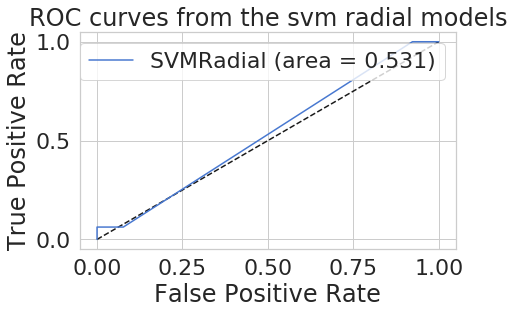

In [22]:
#-----ROC curve for svmradial model-----#
modelSVMRadial=svm.SVC(kernel='rbf', probability=True)
modelSVMRadial.fit(train_X,train_Y)

y_pred_prob_SVMRadial = modelSVMRadial.predict_proba(test_X)[:,1]
fpr_SVMRadial, tpr_SVMRadial, thresholds_SVMRadial = roc_curve(test_Y-1, y_pred_prob_SVMRadial, pos_label=0)
roc_auc_SVMRadial = auc(fpr_SVMRadial, tpr_SVMRadial)
precision_SVMRadial, recall_SVMRadial, th_SVMRadial = precision_recall_curve(test_Y, y_pred_prob_SVMRadial)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMRadial, tpr_SVMRadial, label='SVMRadial (area = %0.3f)' % roc_auc_SVMRadial)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the svm radial models')
plt.legend(loc='best')
plt.show()

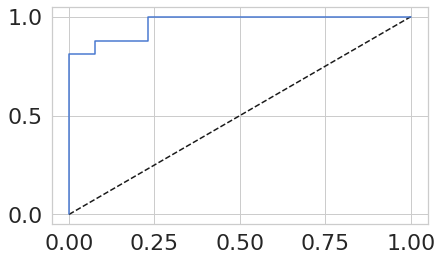

In [23]:
#-----ROC curve for SVM model-----#
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(train_X,train_Y)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y-1, y_pred_prob_SVMlinear, pos_label=0)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)

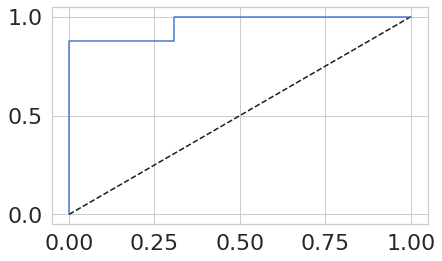

In [24]:
# ROC curve for Logistic regression model
modellogisticregession=LogisticRegression()
modellogisticregession.fit(train_X,train_Y)
y_pred_prob_logisticregression = modellogisticregession.predict_proba(test_X)[:,1]
fpr_logisticregression, tpr_logisticregression, thresholds_logisticregression = roc_curve(test_Y-1, y_pred_prob_logisticregression, pos_label=0)
roc_auc_logisticregression = auc(fpr_logisticregression, tpr_logisticregression)
precision_logisticregression, recall_logisticregression, th_logisticregression = precision_recall_curve(test_Y, y_pred_prob_logisticregression)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logisticregression, tpr_logisticregression, label='Logistic Regression (area = %0.3f)' % roc_auc_logisticregression)

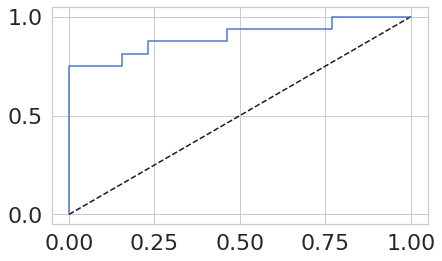

In [25]:
# ROC curve for RandomForest model
modelRandomForest=RandomForestClassifier(n_estimators=100,random_state=0)
modelRandomForest.fit(train_X,train_Y)
y_pred_prob_RandomForest = modelRandomForest.predict_proba(test_X)[:,1]
fpr_RandomForest, tpr_RandomForest, thresholds_RandomForest = roc_curve(test_Y-1, y_pred_prob_RandomForest, pos_label=0)
roc_auc_RandomForest = auc(fpr_RandomForest, tpr_RandomForest)
precision_RandomForest, recall_RandomForest, th_RandomForest= precision_recall_curve(test_Y, y_pred_prob_RandomForest)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RandomForest, tpr_RandomForest, label='RandomForest (area = %0.3f)' % roc_auc_RandomForest)

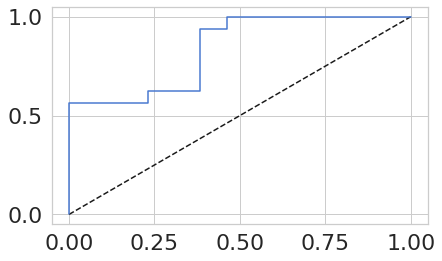

In [26]:
# ROC curve for GaussianNB model
modelGaussianNB=GaussianNB()
modelGaussianNB.fit(train_X,train_Y)
y_pred_prob_GaussianNB = modelGaussianNB.predict_proba(test_X)[:,1]
fpr_GaussianNB, tpr_GaussianNB, thresholds_GaussianNB = roc_curve(test_Y-1, y_pred_prob_GaussianNB, pos_label=0)
roc_auc_GaussianNB = auc(fpr_GaussianNB, tpr_GaussianNB)
precision_GaussianNB, recall_GaussianNB, th_GaussianNB = precision_recall_curve(test_Y, y_pred_prob_GaussianNB)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_GaussianNB, tpr_GaussianNB, label='GaussianNB (area = %0.3f)' % roc_auc_GaussianNB)

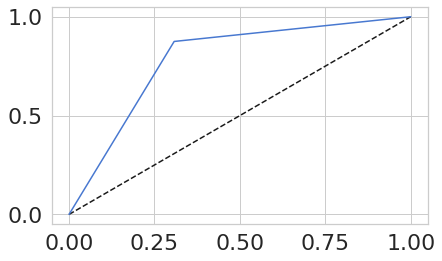

In [27]:
# ROC curve for DecisionTree model
modelDecisionTree=DecisionTreeClassifier()
modelDecisionTree.fit(train_X,train_Y)
y_pred_prob_DecisionTree = modelDecisionTree.predict_proba(test_X)[:,1]
fpr_DecisionTree, tpr_DecisionTree, thresholds_DecisionTree = roc_curve(test_Y-1, y_pred_prob_DecisionTree, pos_label=0)
roc_auc_DecisionTree = auc(fpr_DecisionTree, tpr_DecisionTree)
precision_DecisionTree, recall_DecisionTree, th_DecisionTree = precision_recall_curve(test_Y, y_pred_prob_DecisionTree)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_DecisionTree, tpr_DecisionTree, label='DecisionTree (area = %0.3f)' % roc_auc_DecisionTree)

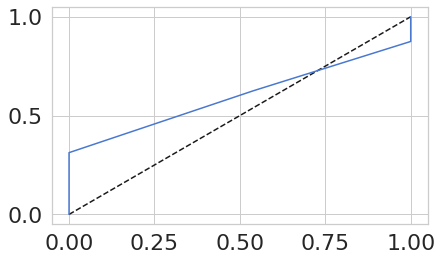

In [28]:
# ROC curve for KNN model
modelRandomforest=KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(train_X,train_Y)
y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y-1, y_pred_prob_KNN, pos_label=0)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)

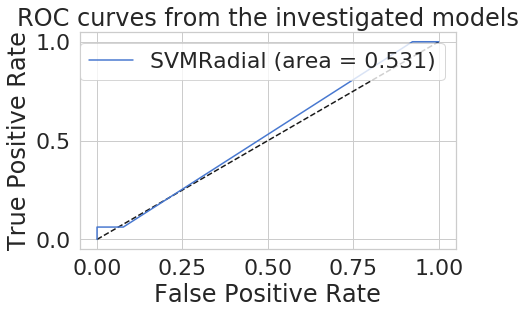

In [29]:
#ROC curve for SVM model
modelSVMRadial=svm.SVC(kernel='rbf', probability=True)
modelSVMRadial.fit(train_X,train_Y)
y_pred_prob_SVMRadial = modelSVMRadial.predict_proba(test_X)[:,1]
fpr_SVMRadial, tpr_SVMRadial, thresholds_SVMRadial = roc_curve(test_Y-1, y_pred_prob_SVMRadial, pos_label=0)
roc_auc_SVMRadial = auc(fpr_SVMRadial, tpr_SVMRadial)
precision_SVMRadial, recall_SVMRadial, th_SVMRadial = precision_recall_curve(test_Y, y_pred_prob_SVMRadial)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMRadial, tpr_SVMRadial, label='SVMRadial (area = %0.3f)' % roc_auc_SVMRadial)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()


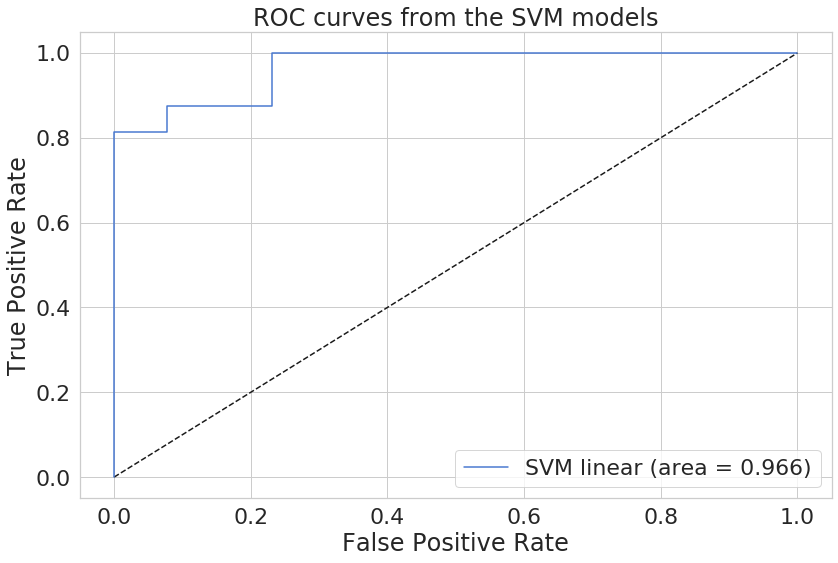

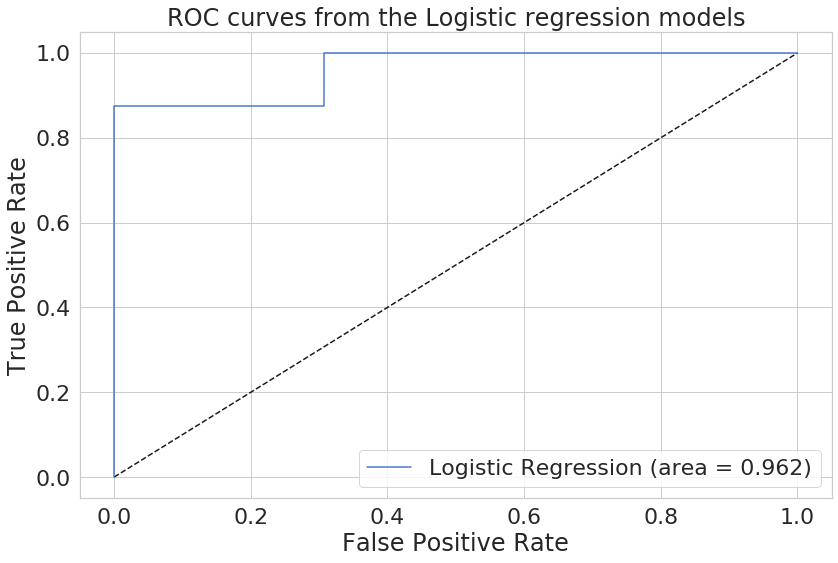

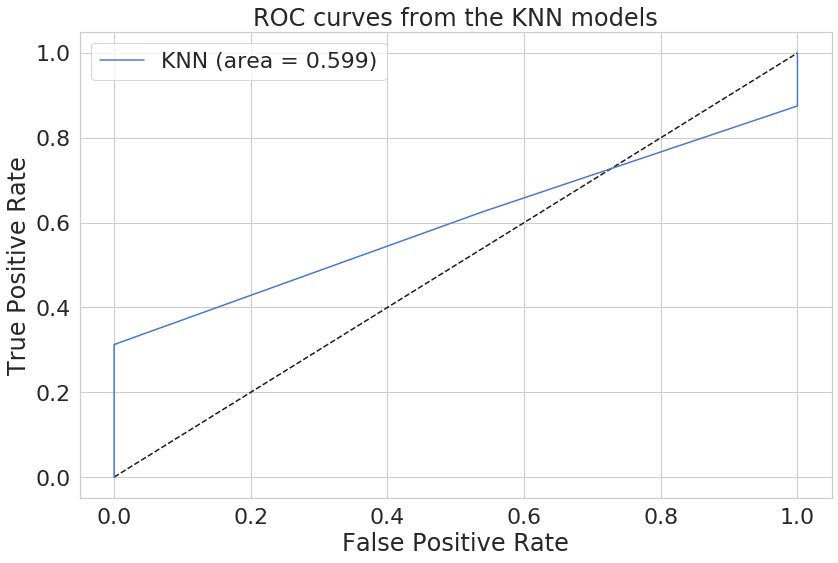

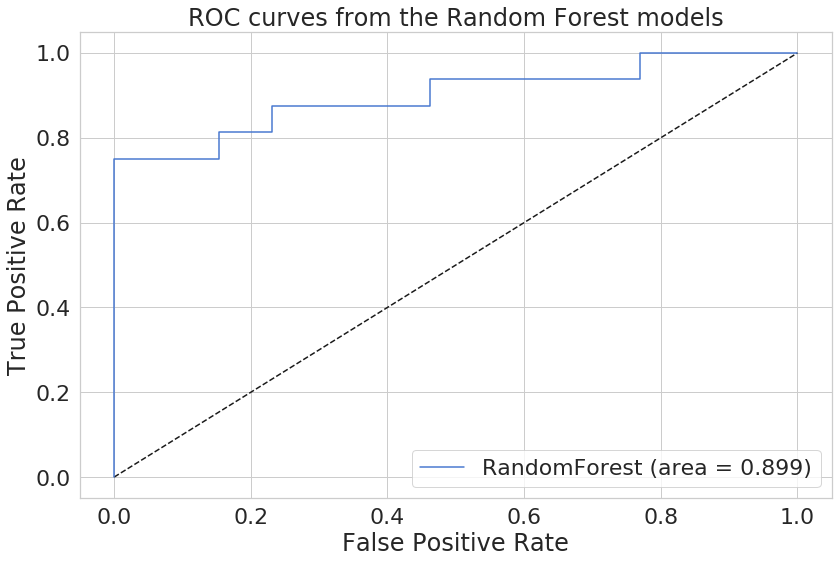

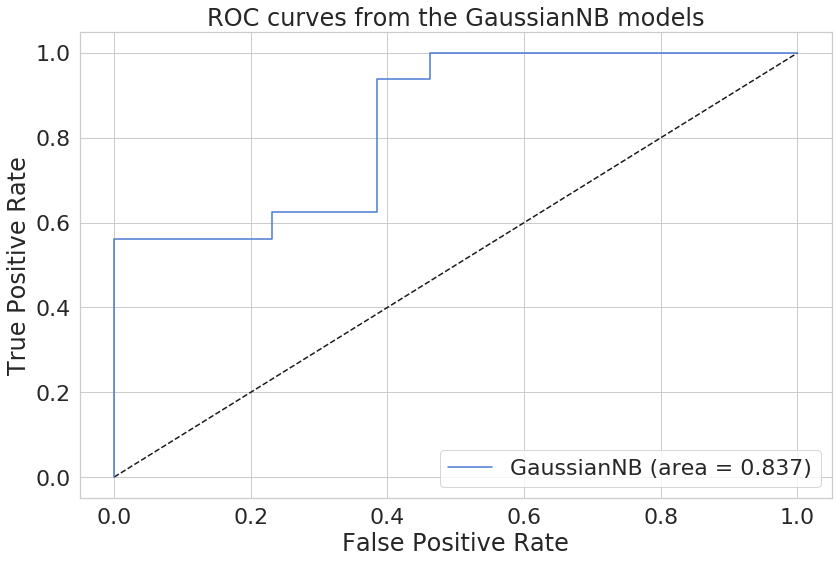

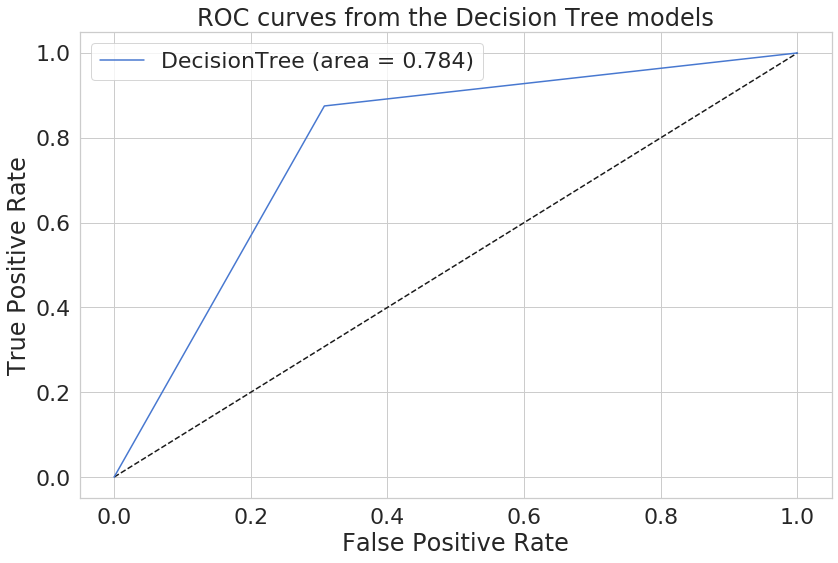

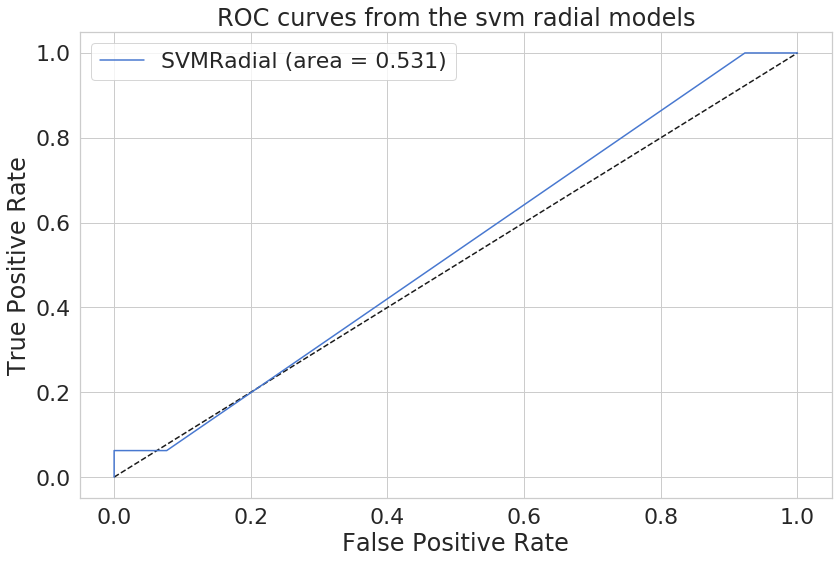

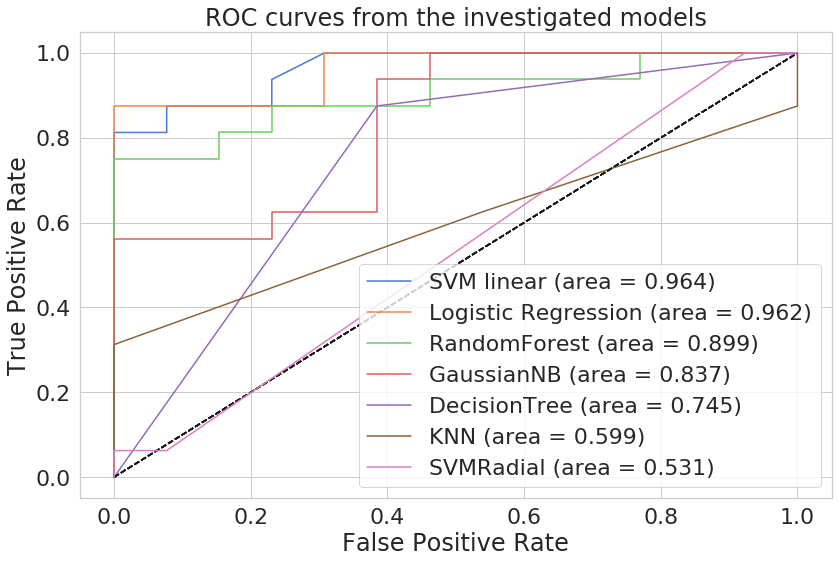

In [62]:
#-----ROC curve for SVM model-----#
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(train_X,train_Y)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y-1, y_pred_prob_SVMlinear, pos_label=0)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the SVM models')
plt.legend(loc='best')
plt.show()

##plt.plot(fpr_SVMlinear[2], tpr_SVMlinear[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2]) plt.plot([1, 2], [1, 2], color='navy', lw=lw, linestyle='--')

##function of kernel is to take data as input and transform it into the required form, For example linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid.
#-----ROC curve for Logistic regression model-----#
modellogisticregession=LogisticRegression()
modellogisticregession.fit(train_X,train_Y)
y_pred_prob_logisticregression = modellogisticregession.predict_proba(test_X)[:,1]
fpr_logisticregression, tpr_logisticregression, thresholds_logisticregression = roc_curve(test_Y-1, y_pred_prob_logisticregression, pos_label=0)
roc_auc_logisticregression = auc(fpr_logisticregression, tpr_logisticregression)
precision_logisticregression, recall_logisticregression, th_logisticregression = precision_recall_curve(test_Y, y_pred_prob_logisticregression)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logisticregression, tpr_logisticregression, label='Logistic Regression (area = %0.3f)' % roc_auc_logisticregression)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the Logistic regression models')
plt.legend(loc='best')
plt.show()

#-----ROC curve for KNN model-----#
modelKNN=KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(train_X,train_Y)
y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y-1, y_pred_prob_KNN, pos_label=0)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the KNN models')
plt.legend(loc='best')
plt.show()

#-----ROC curve for RandomForest model-----#
modelRandomForest=RandomForestClassifier(n_estimators=100,random_state=0)
modelRandomForest.fit(train_X,train_Y)
y_pred_prob_RandomForest = modelRandomForest.predict_proba(test_X)[:,1]
fpr_RandomForest, tpr_RandomForest, thresholds_RandomForest = roc_curve(test_Y-1, y_pred_prob_RandomForest, pos_label=0)
roc_auc_RandomForest = auc(fpr_RandomForest, tpr_RandomForest)
precision_RandomForest, recall_RandomForest, th_RandomForest= precision_recall_curve(test_Y, y_pred_prob_RandomForest)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RandomForest, tpr_RandomForest, label='RandomForest (area = %0.3f)' % roc_auc_RandomForest)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the Random Forest models')
plt.legend(loc='best')
plt.show()

#-----ROC curve for GaussianNB model-----#
modelGaussianNB=GaussianNB()
modelGaussianNB.fit(train_X,train_Y)
y_pred_prob_GaussianNB = modelGaussianNB.predict_proba(test_X)[:,1]
fpr_GaussianNB, tpr_GaussianNB, thresholds_GaussianNB = roc_curve(test_Y-1, y_pred_prob_GaussianNB, pos_label=0)
roc_auc_GaussianNB = auc(fpr_GaussianNB, tpr_GaussianNB)
precision_GaussianNB, recall_GaussianNB, th_GaussianNB = precision_recall_curve(test_Y, y_pred_prob_GaussianNB)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_GaussianNB, tpr_GaussianNB, label='GaussianNB (area = %0.3f)' % roc_auc_GaussianNB)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the GaussianNB models')
plt.legend(loc='best')
plt.show()

#-----ROC curve for DecisionTree model-----#
modelDecisionTree=DecisionTreeClassifier()
modelDecisionTree.fit(train_X,train_Y)
y_pred_prob_DecisionTree = modelDecisionTree.predict_proba(test_X)[:,1]
fpr_DecisionTree, tpr_DecisionTree, thresholds_DecisionTree = roc_curve(test_Y-1, y_pred_prob_DecisionTree, pos_label=0)
roc_auc_DecisionTree = auc(fpr_DecisionTree, tpr_DecisionTree)
precision_DecisionTree, recall_DecisionTree, th_DecisionTree = precision_recall_curve(test_Y, y_pred_prob_DecisionTree)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_DecisionTree, tpr_DecisionTree, label='DecisionTree (area = %0.3f)' % roc_auc_DecisionTree)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the Decision Tree models')
plt.legend(loc='best')
plt.show()

#-----ROC curve for svmradial model-----#
modelSVMRadial=svm.SVC(kernel='rbf', probability=True)
modelSVMRadial.fit(train_X,train_Y)

y_pred_prob_SVMRadial = modelSVMRadial.predict_proba(test_X)[:,1]
fpr_SVMRadial, tpr_SVMRadial, thresholds_SVMRadial = roc_curve(test_Y-1, y_pred_prob_SVMRadial, pos_label=0)
roc_auc_SVMRadial = auc(fpr_SVMRadial, tpr_SVMRadial)
precision_SVMRadial, recall_SVMRadial, th_SVMRadial = precision_recall_curve(test_Y, y_pred_prob_SVMRadial)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMRadial, tpr_SVMRadial, label='SVMRadial (area = %0.3f)' % roc_auc_SVMRadial)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the svm radial models')
plt.legend(loc='best')
plt.show()

#-----ROC curve for SVM model-----#
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(train_X,train_Y)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y-1, y_pred_prob_SVMlinear, pos_label=0)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)

# ROC curve for Logistic regression model
modellogisticregession=LogisticRegression()
modellogisticregession.fit(train_X,train_Y)
y_pred_prob_logisticregression = modellogisticregession.predict_proba(test_X)[:,1]
fpr_logisticregression, tpr_logisticregression, thresholds_logisticregression = roc_curve(test_Y-1, y_pred_prob_logisticregression, pos_label=0)
roc_auc_logisticregression = auc(fpr_logisticregression, tpr_logisticregression)
precision_logisticregression, recall_logisticregression, th_logisticregression = precision_recall_curve(test_Y, y_pred_prob_logisticregression)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logisticregression, tpr_logisticregression, label='Logistic Regression (area = %0.3f)' % roc_auc_logisticregression)

# ROC curve for RandomForest model
modelRandomForest=RandomForestClassifier(n_estimators=100,random_state=0)
modelRandomForest.fit(train_X,train_Y)
y_pred_prob_RandomForest = modelRandomForest.predict_proba(test_X)[:,1]
fpr_RandomForest, tpr_RandomForest, thresholds_RandomForest = roc_curve(test_Y-1, y_pred_prob_RandomForest, pos_label=0)
roc_auc_RandomForest = auc(fpr_RandomForest, tpr_RandomForest)
precision_RandomForest, recall_RandomForest, th_RandomForest= precision_recall_curve(test_Y, y_pred_prob_RandomForest)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RandomForest, tpr_RandomForest, label='RandomForest (area = %0.3f)' % roc_auc_RandomForest)


# ROC curve for GaussianNB model
modelGaussianNB=GaussianNB()
modelGaussianNB.fit(train_X,train_Y)
y_pred_prob_GaussianNB = modelGaussianNB.predict_proba(test_X)[:,1]
fpr_GaussianNB, tpr_GaussianNB, thresholds_GaussianNB = roc_curve(test_Y-1, y_pred_prob_GaussianNB, pos_label=0)
roc_auc_GaussianNB = auc(fpr_GaussianNB, tpr_GaussianNB)
precision_GaussianNB, recall_GaussianNB, th_GaussianNB = precision_recall_curve(test_Y, y_pred_prob_GaussianNB)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_GaussianNB, tpr_GaussianNB, label='GaussianNB (area = %0.3f)' % roc_auc_GaussianNB)

# ROC curve for DecisionTree model
modelDecisionTree=DecisionTreeClassifier()
modelDecisionTree.fit(train_X,train_Y)
y_pred_prob_DecisionTree = modelDecisionTree.predict_proba(test_X)[:,1]
fpr_DecisionTree, tpr_DecisionTree, thresholds_DecisionTree = roc_curve(test_Y-1, y_pred_prob_DecisionTree, pos_label=0)
roc_auc_DecisionTree = auc(fpr_DecisionTree, tpr_DecisionTree)
precision_DecisionTree, recall_DecisionTree, th_DecisionTree = precision_recall_curve(test_Y, y_pred_prob_DecisionTree)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_DecisionTree, tpr_DecisionTree, label='DecisionTree (area = %0.3f)' % roc_auc_DecisionTree)
# ROC curve for KNN model
modelRandomforest=KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(train_X,train_Y)
y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y-1, y_pred_prob_KNN, pos_label=0)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)

#ROC curve for SVM model
modelSVMRadial=svm.SVC(kernel='rbf', probability=True)
modelSVMRadial.fit(train_X,train_Y)
y_pred_prob_SVMRadial = modelSVMRadial.predict_proba(test_X)[:,1]
fpr_SVMRadial, tpr_SVMRadial, thresholds_SVMRadial = roc_curve(test_Y-1, y_pred_prob_SVMRadial, pos_label=0)
roc_auc_SVMRadial = auc(fpr_SVMRadial, tpr_SVMRadial)
precision_SVMRadial, recall_SVMRadial, th_SVMRadial = precision_recall_curve(test_Y, y_pred_prob_SVMRadial)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMRadial, tpr_SVMRadial, label='SVMRadial (area = %0.3f)' % roc_auc_SVMRadial)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()



<Figure size 432x288 with 0 Axes>

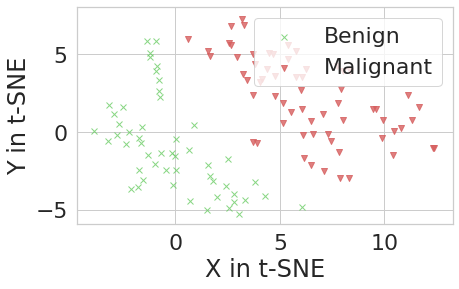

In [30]:
# t-SNA visualiztaion of data-sets
df_std = StandardScaler().fit_transform(df)
y = df.iloc[:,-1].values
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
x_t = tsne.fit_transform(df_std)
color_map = {2:'red', 1:'blue'}
plt.figure()
plt.figure()
plt.scatter(x_t[np.where(y == 0), 0], x_t[np.where(y == 0), 1], marker='x', color='g', 
            linewidth='1', alpha=0.8, label='Benign')
plt.scatter(x_t[np.where(y == 1), 0], x_t[np.where(y == 1), 1], marker='v', color='r',
            linewidth='1', alpha=0.8, label='Malignant')

plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper right')
#plt.title('t-SNE visualization of diabetes data')
plt.show()

In [64]:
# Genetic Algorithms

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import Bunch
from sklearn.svm import SVC

In [66]:
df1=pd.read_csv('dataR2.csv')

In [67]:
Y=df1.loc[:,'Classification']
X=df1.loc[:,['HOMA', 'Glucose', 'Adiponectin', 'MCP.1','Insulin', 'BMI', 'Resistin', 'Age','Leptin']]


In [68]:
X=X.values
Y=Y.values
dataset= Bunch(data=X,target=Y)

In [69]:
class genetics(object):
  def population_generate(self,sample_size,row_size):
    generate=np.zeros([sample_size,row_size],dtype='int16')
    for i in range(0,sample_size):
      for j in range(0,row_size):
        generate[i][j]=(round(np.random.uniform(0,8)))
    return generate

  def fitness(self,samples,size):
    accuracy=[]
    for i in range(0,size):
      X=dataset.data[:,samples[i]]
      Y=dataset.target
      X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
      model=SVC(kernel='linear',random_state=0)
      hist=model.fit(X_train,Y_train)
      y=hist.predict(X_test)
      accuracy.append(accuracy_score(y,Y_test))
    return accuracy
  
  def selection(self,fitness,samples):
    best_finder=fitness.copy()
    best_finder.sort(reverse=True)
    best_4=best_finder
    best_4=list(set(best_4))
    best_4_a=best_4[0:4]
    indexes=[]
    for i in range(0,4):
      indexes.append(fit.index(best_4_a[i]))
    best_samples=samples[indexes].tolist()
    return best_samples
  
  def crossover(self,best_samples):
   off_springs=np.zeros([len(best_samples),len(best_samples[0])])
   for i in range(0,len(best_samples)):
     for j in range(0,len(best_samples[0])):
       if j<(len(best_samples[0])/2):
         off_springs[i][j]=best_samples[i][j]
       else:
         if i==0 and i==2:
           k=0
           while(k<len(best_samples[0])):
             if best_samples[i+1][k] not in off_springs[i]:
               off_springs[i][j]=best_samples[i+1][k]
               break
             k+=1
         else:
           k=0
           while(k<len(best_samples[1])):
             if best_samples[i-1][k] not in off_springs[i]:
               off_springs[i][j]=best_samples[i-1][k]
               break
             k+=1
   return off_springs
  
  def mutation(self,crossed):
    random.seed()
    for i in range(len(crossed)):
      x=random.randint(0,8)
      y=random.randint(0,7)
      while x in crossed[i]:
        x=random.randint(0,8)
      crossed[i][y]=x
    return crossed

In [70]:
gene=genetics()

In [71]:
samples=gene.population_generate(10,8)
samples

array([[4, 0, 1, 7, 0, 6, 3, 1],
       [5, 0, 7, 5, 4, 5, 3, 4],
       [4, 5, 3, 6, 7, 1, 8, 0],
       [0, 4, 1, 2, 6, 2, 0, 7],
       [5, 2, 5, 6, 5, 4, 2, 8],
       [3, 0, 4, 6, 4, 4, 5, 6],
       [1, 6, 1, 4, 8, 6, 7, 5],
       [6, 2, 7, 6, 3, 1, 0, 1],
       [5, 7, 7, 2, 8, 6, 3, 1],
       [5, 3, 7, 2, 6, 0, 4, 2]], dtype=int16)

In [72]:
gen_accuracy = []
for _ in range(10):
    samples=gene.population_generate(10,8)
    torun=True
    number_of_features=8
    best_so_far=0
    best_features=[]
    k=1
    last_best=0
    count=0
    till_best=[]
    while(torun):
      print("iteration: ",k)
      fit=gene.fitness(samples,number_of_features)
      best_so_far=max(fit)
      till_best.append(best_so_far)
      if(best_so_far<max(till_best)):
        torun=False
        break
      last_best=best_so_far
      best_samples=gene.selection(fit,samples)
      best_features=[]
      best_features.append(best_samples[0])
      crossed=gene.crossover(best_samples)
      mutate=gene.mutation(crossed)
      size_of_sample=int(len(samples[0])/2)
      for io in range(0,size_of_sample-1):
        samples[io]=best_samples[io]
      for io2 in range(len(mutate)):
        io+=1
        samples[io]=mutate[io2]
      k+=1

    print("Best Features : ",best_features)
    print("Accuracy : ",till_best[-1])
    gen_accuracy.append(till_best[-1])

iteration:  1
iteration:  2
iteration:  3
iteration:  4
Best Features :  [[5, 1, 2, 7, 2, 3, 3, 4]]
Accuracy :  0.7931034482758621
iteration:  1
iteration:  2
Best Features :  [[4, 6, 4, 6, 1, 0, 8, 3]]
Accuracy :  0.7586206896551724
iteration:  1
iteration:  2
Best Features :  [[4, 4, 6, 4, 1, 6, 1, 4]]
Accuracy :  0.7241379310344828
iteration:  1
iteration:  2
Best Features :  [[6, 2, 3, 0, 1, 5, 6, 5]]
Accuracy :  0.7241379310344828
iteration:  1
iteration:  2
Best Features :  [[3, 4, 2, 7, 1, 5, 0, 3]]
Accuracy :  0.8275862068965517
iteration:  1
iteration:  2
Best Features :  [[4, 1, 2, 6, 5, 3, 5, 4]]
Accuracy :  0.7931034482758621
iteration:  1
iteration:  2
iteration:  3
Best Features :  [[5, 2, 4, 6, 1, 3, 7, 0]]
Accuracy :  0.7931034482758621
iteration:  1
iteration:  2
Best Features :  [[3, 6, 2, 1, 5, 4, 2, 7]]
Accuracy :  0.7241379310344828
iteration:  1
iteration:  2
Best Features :  [[2, 7, 0, 7, 4, 6, 4, 8]]
Accuracy :  0.7586206896551724
iteration:  1
iteration:  2
ite

In [73]:
boxT['Genetic Algorithm'] = gen_accuracy

In [74]:
boxT

,Linear Svm,Radial Svm,Logistic Regression,KNN,Decision Tree,Random forest,Naive Bayes,Genetic Algorithm
0,0.250000,0.166667,0.166667,0.416667,0.416667,0.250000,0.916667,0.793103
1,0.250000,0.416667,0.250000,0.416667,0.833333,0.583333,0.750000,0.758621
2,0.416667,0.500000,0.333333,0.416667,0.500000,0.416667,0.583333,0.724138
3,0.750000,0.416667,0.750000,0.500000,0.500000,0.500000,0.916667,0.724138
4,0.833333,0.833333,0.833333,0.750000,0.500000,0.750000,0.416667,0.827586
5,0.833333,0.666667,0.666667,0.750000,0.250000,0.583333,0.166667,0.793103
6,0.636364,0.818182,0.727273,0.636364,0.636364,0.909091,0.454545,0.793103
7,0.727273,0.727273,0.818182,0.636364,0.909091,0.818182,0.727273,0.724138
8,0.454545,0.454545,0.454545,0.363636,0.636364,0.545455,0.181818,0.758621
9,0.181818,0.090909,0.090909,0.181818,0.363636,0.272727,0.363636,0.793103


In [75]:
# Deep Belief Netwrok

In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from dbn import SupervisedDBNClassification, SupervisedDBNRegression
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import accuracy_score

In [77]:
df= pd.read_csv("dataR2.csv")
#X = np.array(df.drop(["label"], axis=1))
X=np.array(df.drop(["Classification"],axis=1))
Y = np.array(df["Classification"])

In [78]:
Classification=df['Classification']
data=df[df.columns[:9]]
train,test=train_test_split(df,test_size=0.2,random_state=0,stratify=df['Classification'])# stratify the outcome
train_X=train[train.columns[:9]]
test_X=test[test.columns[:9]]
train_Y=train['Classification']
test_Y=test['Classification']

In [79]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X = ss.fit_transform(X)

In [80]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=0)

In [81]:
dbn_acc = []
for lr in np.arange(0.03, 0.13, 0.01):
    classifier = SupervisedDBNClassification(hidden_layers_structure =       [256, 256],
    learning_rate_rbm=0.05,
    learning_rate=lr,
    n_epochs_rbm=10,
    n_iter_backprop=100,
    batch_size=32,
    activation_function='relu',
    dropout_p=0.2)
    
    classifier.fit(train_X, train_Y)
    

    Y_pred = classifier.predict(test_X)
    acc = accuracy_score(test_Y, Y_pred)
    dbn_acc.append(acc)
    print('Done.\nAccuracy: %f' % acc)
    
    

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 5.275937
>> Epoch 2 finished 	RBM Reconstruction error 4.790981
>> Epoch 3 finished 	RBM Reconstruction error 4.325324
>> Epoch 4 finished 	RBM Reconstruction error 4.011178
>> Epoch 5 finished 	RBM Reconstruction error 3.827889
>> Epoch 6 finished 	RBM Reconstruction error 3.717062
>> Epoch 7 finished 	RBM Reconstruction error 3.629149
>> Epoch 8 finished 	RBM Reconstruction error 3.584731
>> Epoch 9 finished 	RBM Reconstruction error 3.588475
>> Epoch 10 finished 	RBM Reconstruction error 3.625361
>> Epoch 1 finished 	RBM Reconstruction error 14.095695
>> Epoch 2 finished 	RBM Reconstruction error 7.529213
>> Epoch 3 finished 	RBM Reconstruction error 6.832743
>> Epoch 4 finished 	RBM Reconstruction error 6.069813
>> Epoch 5 finished 	RBM Reconstruction error 5.189957
>> Epoch 6 finished 	RBM Reconstruction error 4.442950
>> Epoch 7 finished 	RBM Reconstruction error 4.109597
>> Epoch 8 finished 	RBM Reconstruct

>> Epoch 25 finished 	ANN training loss 1.248661
>> Epoch 26 finished 	ANN training loss 1.214617
>> Epoch 27 finished 	ANN training loss 1.176871
>> Epoch 28 finished 	ANN training loss 1.163947
>> Epoch 29 finished 	ANN training loss 1.162399
>> Epoch 30 finished 	ANN training loss 1.218310
>> Epoch 31 finished 	ANN training loss 1.239418
>> Epoch 32 finished 	ANN training loss 1.180889
>> Epoch 33 finished 	ANN training loss 1.233310
>> Epoch 34 finished 	ANN training loss 1.166857
>> Epoch 35 finished 	ANN training loss 1.181321
>> Epoch 36 finished 	ANN training loss 1.172706
>> Epoch 37 finished 	ANN training loss 1.157109
>> Epoch 38 finished 	ANN training loss 1.145046
>> Epoch 39 finished 	ANN training loss 1.142144
>> Epoch 40 finished 	ANN training loss 1.171758
>> Epoch 41 finished 	ANN training loss 1.142054
>> Epoch 42 finished 	ANN training loss 1.115142
>> Epoch 43 finished 	ANN training loss 1.174320
>> Epoch 44 finished 	ANN training loss 1.150383
>> Epoch 45 finished

>> Epoch 71 finished 	ANN training loss 1.099302
>> Epoch 72 finished 	ANN training loss 1.056228
>> Epoch 73 finished 	ANN training loss 1.088440
>> Epoch 74 finished 	ANN training loss 1.084753
>> Epoch 75 finished 	ANN training loss 1.036704
>> Epoch 76 finished 	ANN training loss 1.023021
>> Epoch 77 finished 	ANN training loss 1.040853
>> Epoch 78 finished 	ANN training loss 0.986879
>> Epoch 79 finished 	ANN training loss 0.981379
>> Epoch 80 finished 	ANN training loss 1.029173
>> Epoch 81 finished 	ANN training loss 1.020627
>> Epoch 82 finished 	ANN training loss 1.005873
>> Epoch 83 finished 	ANN training loss 1.001099
>> Epoch 84 finished 	ANN training loss 1.019696
>> Epoch 85 finished 	ANN training loss 1.076057
>> Epoch 86 finished 	ANN training loss 1.035616
>> Epoch 87 finished 	ANN training loss 0.999412
>> Epoch 88 finished 	ANN training loss 0.941798
>> Epoch 89 finished 	ANN training loss 1.018187
>> Epoch 90 finished 	ANN training loss 1.010154
>> Epoch 91 finished

>> Epoch 1 finished 	RBM Reconstruction error 14.805227
>> Epoch 2 finished 	RBM Reconstruction error 8.238067
>> Epoch 3 finished 	RBM Reconstruction error 6.962939
>> Epoch 4 finished 	RBM Reconstruction error 5.968723
>> Epoch 5 finished 	RBM Reconstruction error 4.888673
>> Epoch 6 finished 	RBM Reconstruction error 4.279731
>> Epoch 7 finished 	RBM Reconstruction error 4.079620
>> Epoch 8 finished 	RBM Reconstruction error 3.885411
>> Epoch 9 finished 	RBM Reconstruction error 3.680836
>> Epoch 10 finished 	RBM Reconstruction error 3.518089
[END] Pre-training step
[START] Fine tuning step:
>> Epoch 1 finished 	ANN training loss 1.382324
>> Epoch 2 finished 	ANN training loss 1.340797
>> Epoch 3 finished 	ANN training loss 1.292643
>> Epoch 4 finished 	ANN training loss 1.300457
>> Epoch 5 finished 	ANN training loss 1.292999
>> Epoch 6 finished 	ANN training loss 1.270928
>> Epoch 7 finished 	ANN training loss 1.267093
>> Epoch 8 finished 	ANN training loss 1.275227
>> Epoch 9 fin

>> Epoch 40 finished 	ANN training loss 1.010293
>> Epoch 41 finished 	ANN training loss 1.119934
>> Epoch 42 finished 	ANN training loss 1.039482
>> Epoch 43 finished 	ANN training loss 0.979158
>> Epoch 44 finished 	ANN training loss 1.161425
>> Epoch 45 finished 	ANN training loss 1.045368
>> Epoch 46 finished 	ANN training loss 1.024437
>> Epoch 47 finished 	ANN training loss 1.049336
>> Epoch 48 finished 	ANN training loss 0.969805
>> Epoch 49 finished 	ANN training loss 1.025626
>> Epoch 50 finished 	ANN training loss 0.927266
>> Epoch 51 finished 	ANN training loss 0.995453
>> Epoch 52 finished 	ANN training loss 1.002671
>> Epoch 53 finished 	ANN training loss 1.052551
>> Epoch 54 finished 	ANN training loss 0.957482
>> Epoch 55 finished 	ANN training loss 0.996302
>> Epoch 56 finished 	ANN training loss 1.042751
>> Epoch 57 finished 	ANN training loss 1.121363
>> Epoch 58 finished 	ANN training loss 1.025438
>> Epoch 59 finished 	ANN training loss 1.059228
>> Epoch 60 finished

>> Epoch 87 finished 	ANN training loss 0.936371
>> Epoch 88 finished 	ANN training loss 0.889198
>> Epoch 89 finished 	ANN training loss 0.952296
>> Epoch 90 finished 	ANN training loss 0.942933
>> Epoch 91 finished 	ANN training loss 0.921763
>> Epoch 92 finished 	ANN training loss 0.908759
>> Epoch 93 finished 	ANN training loss 0.889320
>> Epoch 94 finished 	ANN training loss 0.901615
>> Epoch 95 finished 	ANN training loss 0.858836
>> Epoch 96 finished 	ANN training loss 0.906165
>> Epoch 97 finished 	ANN training loss 0.920395
>> Epoch 98 finished 	ANN training loss 0.926092
>> Epoch 99 finished 	ANN training loss 0.834905
>> Epoch 100 finished 	ANN training loss 0.882506
[END] Fine tuning step
Done.
Accuracy: 0.724138
[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 5.354952
>> Epoch 2 finished 	RBM Reconstruction error 4.834524
>> Epoch 3 finished 	RBM Reconstruction error 4.336164
>> Epoch 4 finished 	RBM Reconstruction error 3.985033
>> Epoch 5 finishe

>> Epoch 8 finished 	ANN training loss 1.247695
>> Epoch 9 finished 	ANN training loss 1.226028
>> Epoch 10 finished 	ANN training loss 1.171510
>> Epoch 11 finished 	ANN training loss 1.185995
>> Epoch 12 finished 	ANN training loss 1.149569
>> Epoch 13 finished 	ANN training loss 1.108553
>> Epoch 14 finished 	ANN training loss 1.192675
>> Epoch 15 finished 	ANN training loss 1.262015
>> Epoch 16 finished 	ANN training loss 1.165824
>> Epoch 17 finished 	ANN training loss 1.111826
>> Epoch 18 finished 	ANN training loss 1.129459
>> Epoch 19 finished 	ANN training loss 1.093982
>> Epoch 20 finished 	ANN training loss 1.085953
>> Epoch 21 finished 	ANN training loss 1.142843
>> Epoch 22 finished 	ANN training loss 1.110593
>> Epoch 23 finished 	ANN training loss 1.083946
>> Epoch 24 finished 	ANN training loss 1.115992
>> Epoch 25 finished 	ANN training loss 1.107297
>> Epoch 26 finished 	ANN training loss 1.081182
>> Epoch 27 finished 	ANN training loss 1.062185
>> Epoch 28 finished 	

>> Epoch 53 finished 	ANN training loss 0.950502
>> Epoch 54 finished 	ANN training loss 0.902493
>> Epoch 55 finished 	ANN training loss 0.915381
>> Epoch 56 finished 	ANN training loss 0.960885
>> Epoch 57 finished 	ANN training loss 1.051119
>> Epoch 58 finished 	ANN training loss 0.915324
>> Epoch 59 finished 	ANN training loss 0.980878
>> Epoch 60 finished 	ANN training loss 0.913330
>> Epoch 61 finished 	ANN training loss 0.981085
>> Epoch 62 finished 	ANN training loss 0.918035
>> Epoch 63 finished 	ANN training loss 0.930144
>> Epoch 64 finished 	ANN training loss 0.980933
>> Epoch 65 finished 	ANN training loss 0.792910
>> Epoch 66 finished 	ANN training loss 0.973745
>> Epoch 67 finished 	ANN training loss 0.923640
>> Epoch 68 finished 	ANN training loss 0.895634
>> Epoch 69 finished 	ANN training loss 0.964698
>> Epoch 70 finished 	ANN training loss 0.879189
>> Epoch 71 finished 	ANN training loss 0.835798
>> Epoch 72 finished 	ANN training loss 0.885298
>> Epoch 73 finished

In [32]:
Y_pred

NameError: name 'Y_pred' is not defined

In [48]:
len(dbn_acc)

10

In [49]:
boxT['DBN Model'] = dbn_acc


In [50]:
classifiers.append('Genetic Algo')
classifiers.append('DBN Algo')

In [51]:
boxT

,Linear Svm,Radial Svm,Logistic Regression,KNN,Decision Tree,Random forest,Naive Bayes,Genetic Algorithm,DBN Model
0,0.250000,0.166667,0.166667,0.416667,0.416667,0.250000,0.916667,0.827586,0.689655
1,0.250000,0.416667,0.250000,0.416667,0.833333,0.583333,0.750000,0.724138,0.724138
2,0.416667,0.500000,0.333333,0.416667,0.416667,0.416667,0.583333,0.827586,0.724138
3,0.750000,0.416667,0.750000,0.500000,0.416667,0.500000,0.916667,0.827586,0.689655
4,0.833333,0.833333,0.833333,0.750000,0.500000,0.750000,0.416667,0.793103,0.724138
5,0.833333,0.666667,0.666667,0.750000,0.250000,0.583333,0.166667,0.793103,0.689655
6,0.636364,0.818182,0.727273,0.636364,0.636364,0.909091,0.454545,0.827586,0.689655
7,0.727273,0.727273,0.818182,0.636364,0.909091,0.818182,0.727273,0.793103,0.724138
8,0.454545,0.454545,0.454545,0.363636,0.636364,0.545455,0.181818,0.793103,0.689655
9,0.181818,0.090909,0.090909,0.181818,0.545455,0.272727,0.363636,0.793103,0.655172


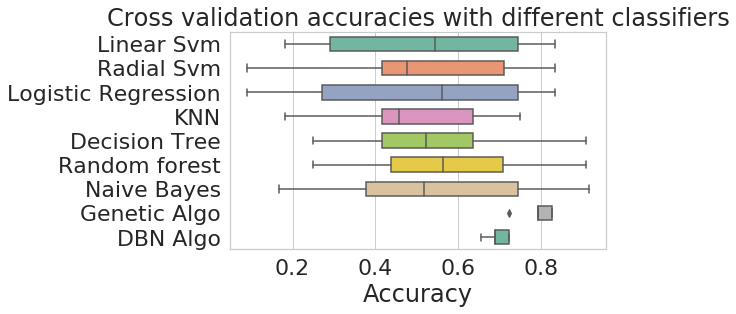

In [53]:
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.6)
ax.set_yticklabels(classifiers)
#ax.set_title('')
#plt.title('Cross validation accuracies with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()


In [ ]:
#-----ROC curve for Genetic A-----#
